In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('../files/Data_empleados_historico .xlsx', sheet_name='Data_empleados_historico')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1270 non-null   int64  
 1   Unnamed: 0                1270 non-null   int64  
 2   edad                      1270 non-null   int64  
 3   abandono                  1270 non-null   object 
 4   viajes                    1270 non-null   object 
 5   departamento              1270 non-null   object 
 6   distancia_casa            1270 non-null   int64  
 7   educacion                 1187 non-null   object 
 8   carrera                   1270 non-null   object 
 9   empleados                 1270 non-null   int64  
 10  satisfaccion_entorno      1270 non-null   object 
 11  sexo                      1094 non-null   float64
 12  implicacion               1254 non-null   object 
 13  nivel_laboral             1270 non-null   int64  
 14  puesto  

In [3]:
data.columns

Index(['id', 'Unnamed: 0', 'edad', 'abandono', 'viajes', 'departamento',
       'distancia_casa', 'educacion', 'carrera', 'empleados',
       'satisfaccion_entorno', 'sexo', 'implicacion', 'nivel_laboral',
       'puesto', 'satisfaccion_trabajo', 'estado_civil', 'salario_mes',
       'num_empresas_anteriores', 'mayor_edad', 'horas_extra',
       'incremento_salario_porc', 'evaluacion', 'satisfaccion_companeros',
       'horas_quincena', 'nivel_acciones', 'anos_experiencia',
       'num_formaciones_ult_ano', 'conciliacion', 'anos_compania',
       'anos_en_puesto', 'anos_desde_ult_promocion',
       'anos_con_manager_actual'],
      dtype='object')

In [4]:
# Eliminación de columnas innecesarias
data = data.drop(columns=['horas_quincena', 'mayor_edad', 'Unnamed: 0', 'empleados', 'sexo'])

In [5]:
# Tratamiento de la variable educación:
mask_other_career = data['carrera'] == 'Other'
# Reemplazar valores nulos o menores a universitario, excepto cuando la carrera es 'Other'
data.loc[~mask_other_career & ((data['educacion'].isnull()) | (data['educacion'].isin(['Secundaria', 'Tecnica', 'Bachillerato']))), 'educacion'] = 'Universitaria'

In [6]:
# Ajuste de la columna salario_mes a formato decimal
data['salario_mes'] = data['salario_mes'].astype(float)

In [7]:
# Reemplazo de nulos en implicacion y satisfaccion_trabajo por No aplica
data['implicacion'].fillna('No aplica', inplace=True)
data['satisfaccion_trabajo'].fillna('No aplica', inplace=True)

C:\Users\julia\AppData\Local\Temp\ipykernel_20040\3945552486.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['implicacion'].fillna('No aplica', inplace=True)
C:\Users\julia\AppData\Local\Temp\ipykernel_20040\3945552486.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [8]:
# Análisis de valores faltantes
missing_data = data.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_data / len(data)) * 100

In [9]:
missing_summary = pd.DataFrame({
    'Valores Faltantes': missing_data,
    'Porcentaje (%)': missing_percentage
})

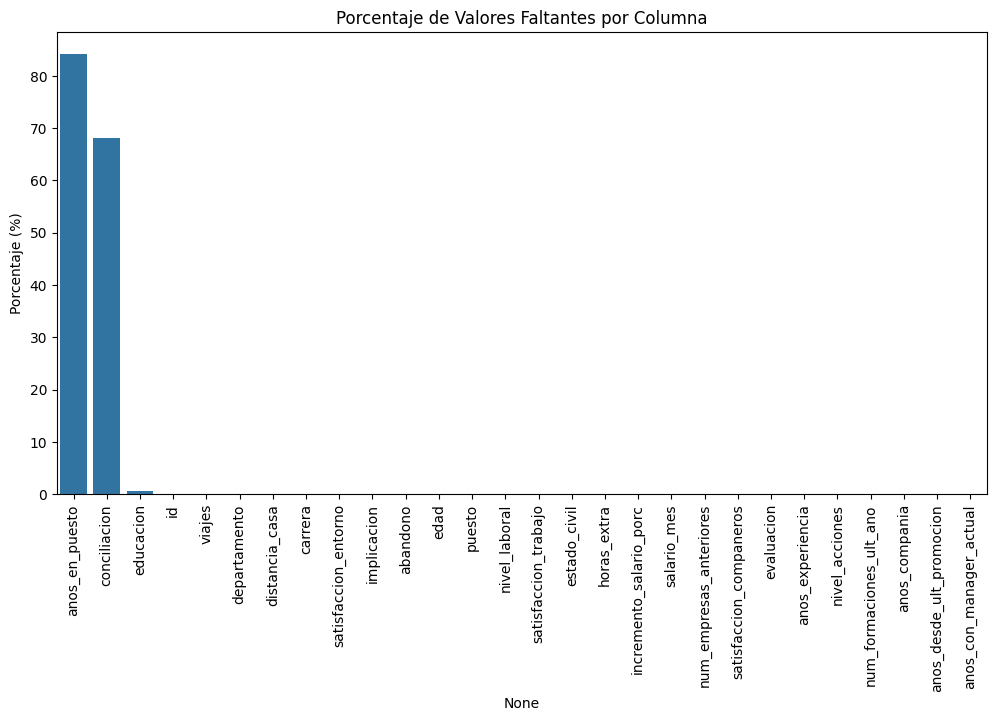

In [10]:
# Visualización de valores faltantes
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_summary.index, y=missing_summary['Porcentaje (%)'])
plt.xticks(rotation=90)
plt.title('Porcentaje de Valores Faltantes por Columna')
plt.show()

In [11]:
# Limpieza de columnas con muchos valores faltantes
# Eliminamos 'anos_en_puesto' y 'conciliacion' por tener >40% de datos faltantes 
data_cleaned = data.drop(columns=['anos_en_puesto', 'conciliacion'])

In [12]:
# Imputación de datos faltantes restantes
data_cleaned['educacion'].fillna(data_cleaned['educacion'].mode()[0], inplace=True)

C:\Users\julia\AppData\Local\Temp\ipykernel_20040\3124704123.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['educacion'].fillna(data_cleaned['educacion'].mode()[0], inplace=True)


In [13]:
# Verificación de datos faltantes restantes
print("Datos faltantes después de la limpieza:")
print(data_cleaned.isnull().sum().sort_values(ascending=False))

Datos faltantes después de la limpieza:
id                          0
edad                        0
abandono                    0
viajes                      0
departamento                0
distancia_casa              0
educacion                   0
carrera                     0
satisfaccion_entorno        0
implicacion                 0
nivel_laboral               0
puesto                      0
satisfaccion_trabajo        0
estado_civil                0
salario_mes                 0
num_empresas_anteriores     0
horas_extra                 0
incremento_salario_porc     0
evaluacion                  0
satisfaccion_companeros     0
nivel_acciones              0
anos_experiencia            0
num_formaciones_ult_ano     0
anos_compania               0
anos_desde_ult_promocion    0
anos_con_manager_actual     0
dtype: int64


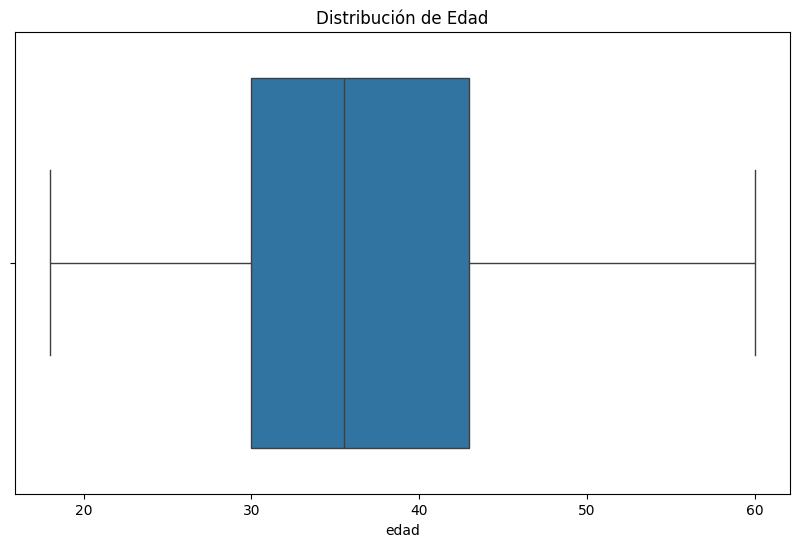

In [14]:
# Visualización de la distribución de edad
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned['edad'])
plt.title('Distribución de Edad')
plt.show()

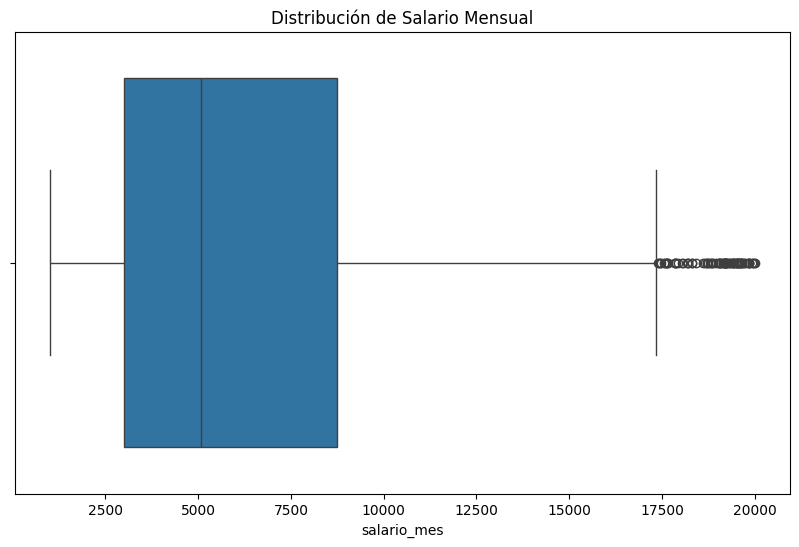

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned['salario_mes'])
plt.title('Distribución de Salario Mensual')
plt.show()

In [16]:
# Guardar el dataset limpio
data_cleaned.to_csv('../files/Datos_empleados_historico_limpio.csv', index=False)